In [10]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML



In [11]:
rng = np.random.default_rng(seed=42)

@dataclass
class Sheep:
    N: int
    X: float
    V: float

    def flock(self):
        """Initialises the position and velocity of the flock of Sheps with spread about zero given by X and V respectively"""
        temp = []
        for _ in range(self.N):
            x = self.X * rng.normal(size=3)
            v = self.V * rng.normal(size=3)
            temp.append(Shep(x, v))
        return np.array(temp)


@dataclass
class Shep:

    x: list[float]
    v: list[float]

    def update_acceleration(self, herd, c_alg, c_coh, c_sep, c_bound, c_rand, theta, boundary):
        """This function uses the Boids algorithm which takes 3 forces: alignment, cohesion and separation 
        plus a forth boundary force to keep the sheps in the space."""

        a_align = np.zeros(3)
        a_cohesion = np.zeros(3)
        a_sep = np.zeros(3)
        a_rand = c_rand * rng.normal(size=3)
        
        for shep in herd:
            if shep is self:
                continue
            
            r = shep.x  - self.x 
            vr = shep.v - self.v  
            rmag_sq = r.dot(r)

            if rmag_sq > out_circ_sq or r.dot(vr) < theta:
                continue

            a_align += c_alg * vr  # Alignment Force
            a_cohesion += c_coh * r # Cohesive Force

            if rmag_sq < in_circ_sq: # Applies the separation force only to sheps within the inner circle
                a_sep -= c_sep * r # Separation Force

        a_total = a_align + a_cohesion + a_sep + a_rand
        a_total += (np.abs(self.x) > boundary) * -np.sign(self.x) * c_bound # Boundary Force
        self.a = a_total
        
        try: # Catches a rare divide by 0 error. Come back and fix so it isnt a bare exception
            self.a = a_total * (1 / float(np.sqrt(a_total.dot(a_total))))
            
        except:
            self.a = np.zeros(3)


    def dynamics(self, dt): 
        """Euler-Cromer Equations of motion for the sheps"""
        self.v += self.a * dt
        self.x += self.v * dt
        

N = 200
X = 10
V = 2

c_alg = 0.3
c_coh = 0.6
c_sep = 1.0
c_rand = 0.5
c_bound = 10
boundary = 5
theta = 0
in_circ_sq = 16
out_circ_sq = 81

herd = Sheep(N, X, V).flock()


KeyboardInterrupt: 

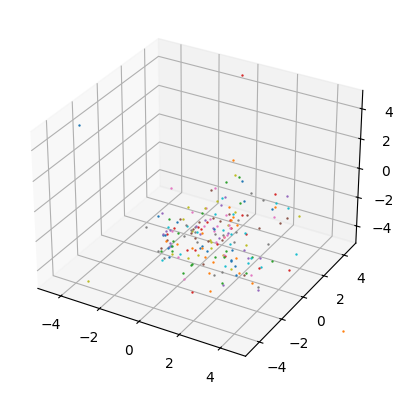

In [12]:
dt = 1
end_time = 100

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


def update(_):
    """Animation of sheps using the dynamics of the Euler-Cromer equations"""
    ax.clear()
    ax.set_xlim(-5, 5)  
    ax.set_ylim(-5, 5)  
    ax.set_zlim(-5, 5)

    for shep in herd:
        ax.scatter(*shep.x, s=0.5)
        shep.update_acceleration(herd, c_alg, c_coh, c_sep, c_bound, c_rand, theta, boundary)
        
    for shep in herd:  
        shep.dynamics(dt)


animation = FuncAnimation(fig, update, frames=int(end_time/dt), interval=100)
animation.save('sheep_animation1.gif', writer='pillow')

HTML(animation.to_jshtml())

